In [65]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [66]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [67]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
#from sqlalchemy import MetaData
#from sqlalchemy import Table
from sqlalchemy import desc

In [68]:
# create engine to hawaii.sqlite
#metadata = MetaData()
engine = create_engine("sqlite:///hawaii.sqlite")

In [69]:
# reflect an existing database into a new model
Base = automap_base()
#Base.metadata.create_all(engine)
# reflect the tables
Base.prepare(engine, reflect=True)
#Station = Table('hawaii_stations', metadata, autoload = True, autoload_with= engine)
#Measurement = Table('hawaii_measurements', metadata, autoload = True, autoload_with= engine)

In [70]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [71]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [72]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [73]:
# Find the most recent date in the data set.
import datetime as dt

Date = session.query(func.max(Measurement.date))
for dates in Date: 
    print(dates)

('2017-08-23',)


In [74]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for dates in latest_date: 
    print(dates)

# Calculate the date one year from the last date in data set.
one_year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year_before)

# Perform a query to retrieve the data and precipitation scores
twelve_month_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= dt.date(2016, 8, 23))
    
for each in twelve_month_prcp:
    print(each)

2017-08-23
2016-08-23
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)


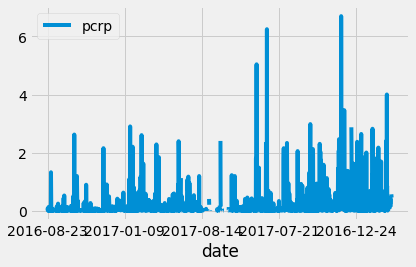

In [75]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(twelve_month_prcp, columns=['date', 'pcrp'])
df.set_index('date', inplace=True)
df.sort_index()
df.plot()
plt.tight_layout()
plt.show()

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [76]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,pcrp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [77]:
# Design a query to calculate the total number stations in the dataset
Stations = session.query(func.count(Station.station)).first()

for stations in Stations: 
    print(stations)

9


In [78]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Station_Activity = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()

for observations in Station_Activity: 
    print(observations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [79]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).first()

(54.0,)

In [80]:
session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs.desc()).first()

(85.0,)

In [81]:
session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').first()

(71.66378066378067,)

In [82]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

twelve_month_tobs = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= dt.datetime(2016, 8, 23))
    
for each in twelve_month_tobs:
    print(each)

('2016-08-24', 77.0)
('2016-08-25', 80.0)
('2016-08-26', 80.0)
('2016-08-27', 75.0)
('2016-08-28', 73.0)
('2016-08-29', 78.0)
('2016-08-30', 77.0)
('2016-08-31', 78.0)
('2016-09-01', 80.0)
('2016-09-02', 80.0)
('2016-09-03', 78.0)
('2016-09-04', 78.0)
('2016-09-05', 78.0)
('2016-09-06', 73.0)
('2016-09-07', 74.0)
('2016-09-08', 80.0)
('2016-09-09', 79.0)
('2016-09-10', 77.0)
('2016-09-11', 80.0)
('2016-09-12', 76.0)
('2016-09-13', 79.0)
('2016-09-14', 75.0)
('2016-09-15', 79.0)
('2016-09-16', 78.0)
('2016-09-17', 79.0)
('2016-09-18', 78.0)
('2016-09-19', 78.0)
('2016-09-20', 76.0)
('2016-09-21', 74.0)
('2016-09-22', 77.0)
('2016-09-23', 78.0)
('2016-09-24', 79.0)
('2016-09-25', 79.0)
('2016-09-26', 77.0)
('2016-09-27', 80.0)
('2016-09-28', 78.0)
('2016-09-29', 78.0)
('2016-09-30', 78.0)
('2016-10-01', 77.0)
('2016-10-02', 79.0)
('2016-10-03', 79.0)
('2016-10-04', 79.0)
('2016-10-05', 79.0)
('2016-10-06', 75.0)
('2016-10-07', 76.0)
('2016-10-08', 73.0)
('2016-10-09', 72.0)
('2016-10-10'

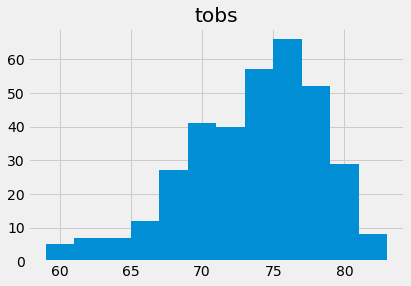

In [83]:
df = pd.DataFrame(twelve_month_tobs, columns=['date', 'tobs'])
df.set_index('date', inplace=True)
df.sort_index()
df.hist(bins = 12)
plt.show()


# Close session

In [84]:
# Close Session
session.close()

In [87]:
# 1. import Flask
from flask import Flask, jsonify

# Create an engine for the chinook.sqlite database
engine = create_engine("sqlite:///..///sqlalchemy-challenge/hawaii.sqlite", echo=False)

In [88]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [89]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [90]:
# Save a reference to the invoices table as `Invoices`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [91]:
# Create a database session object
session = Session(engine)

In [100]:
# 2. Create an app, being sure to pass __name__
app = Flask(__name__)
# 3. Define what to do when a user hits the index route
@app.route("/")
def home():
    print("Server received request for 'Home' page...")
    return (f"Welcome to my 'Home' page!<br/>"
            f"/api/v1.0/precipitation<br/>"
            f"/api/v1.0/stations<br/>"
            f"/api/v1.0/tobs<br/>"
            f"/api/v1.0/temp/start/end"
    )

# 4. Define what to do when a user hits the /about route
@app.route("/api/v1.0/precipitation")
def precipitation():
    print("Server received request for 'Precipitation' page...")
    return "Welcome to my 'Precipitation' page!"
    p.dict = {date: prcp for date, prcp in precipitation}
    return jsonify(p.dict)   


@app.route("/api/v1.0/stations")
def stations():
    print("Server received request for 'Stations' page...")
    return "Welcome to my 'Stations' page!"
    stations = list(np.ravel(results))
    return jsonify(stations=stations)


@app.route("/api/v1.0/tobs")
def tobs():
    print("Server received request for 'TOBS' page...")
    return "Welcome to my 'TOBS' page!"
    results = session.query(Measurement.tobs).\
        filter(Measurement.station == 'USC00519281').\
        filter(Measurement.date >= one_year_before).all()


@app.route("/api/v1.0/temp/<start>")
@app.route("/api/v1.0/temp/<start>/<end>")
def temp_analysis(start=None, end=None):
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]

    if not end:

        start = dt.datetime.strptime(start, "%m%d%Y")
        results = session.query(*sel).\
            filter(Measurement.date >= start).all()

        session.close()

        temps = list(np.ravel(results))
        return jsonify(temps)

    start = dt.datetime.strptime(start, "%m%d%Y")
    end = dt.datetime.strptime(end, "%m%d%Y")

    results = session.query(*sel).\
        filter(Measurement.date >= start).\
        filter(Measurement.date <= end).all()

    session.close()

    temps = list(np.ravel(results))
    return jsonify(temps=temps)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
 * Restarting with watchdog (fsevents)
/opt/anaconda3/lib/python3.9/site-packages/traitlets/traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'hmac-sha256' instead of '"hmac-sha256"' if you require traitlets >=5.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/traitlets/traitlets.py:2157: FutureWarning: Supporting extra quotes around Bytes is deprecated in traitlets 5.0. Use '090a8565-b9bc-4f3b-b1db-36157b6a58d5' instead of 'b"090a8565-b9bc-4f3b-b1db-36157b6a58d5"'.
  warn(
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 8

SystemExit: 1

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
